In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
txn = pd.read_csv('/content/Retail_Data_Transactions.csv')

#1.1 Import the data and create the anchor date columns

In [3]:
print('number of rows')
txn.shape[0] 

number of rows


125000

In [4]:
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [5]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'])

In [6]:
txn = txn.drop('trans_date',axis = 1)
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


In [7]:
txn['txn_date'].min()

Timestamp('2011-05-16 00:00:00')

In [8]:
txn['txn_date'].max()

Timestamp('2015-03-16 00:00:00')

In [9]:
txn['ME_DT']= txn['txn_date']+ pd.offsets.MonthEnd(n=0)

In [10]:
txn['YEAR']=pd.DatetimeIndex(txn['txn_date']).year

In [11]:
txn.loc[55:60]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011
60,CS4421,86,2012-05-20,2012-05-31,2012


#1.2 Create features that capture annual spending

##1

In [12]:
col='tran_amount'
clnt_annual_aggregations=txn.groupby(['customer_id','YEAR']).agg(ann_txn_amt_sum = (col,'sum'),
                                                                ann_txn_amt_ave = (col,'mean'),
                                                                ann_txn_amt_std = (col,'std'),
                                                                ann_txn_amt_var = (col,'var'),
                                                                ann_txn_amt_sem = (col,'sem'),
                                                                ann_txn_amt_max =(col,'max'),
                                                                ann_txn_amt_min = (col,'min'),
                                                                ann_txn_cnt = (col,'count'))

In [13]:
clnt_annual_aggregations[:10]

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
CS1113      2011              244        81.333333        21.079216   
            2012              374        74.800000        17.035258   
            2013              426        85.200000        13.084342   
            2014              226        56.500000        27.958302   
            2015              220        73.333333        27.300794   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
CS1113      2011       444.333333        12.170091               94   
            2012       290.200000         7.618399               95   
            2013       171.200000         5.851496               97   
            2014       781.666667        13.979151               97   
            2015       745.333333        15.762121               98   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id YEAR                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1  
CS1113      2011               57            3  
            2012               51            5  
            2013               65            5  
            2014               36            4  
            2015               44            3

##2

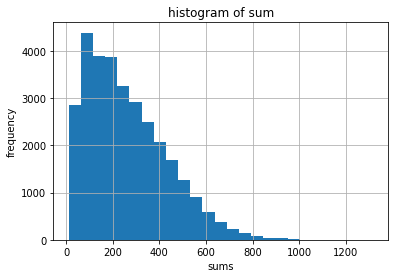

In [14]:
clnt_annual_aggregations['ann_txn_amt_sum'].hist(bins=25)
plt.title('histogram of sum')
plt.xlabel('sums')
plt.ylabel('frequency')
plt.show()

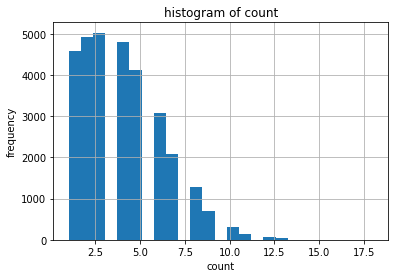

In [15]:
clnt_annual_aggregations['ann_txn_cnt'].hist(bins=25)
plt.title('histogram of count')
plt.xlabel('count')
plt.ylabel('frequency')
plt.show()

##3

In [16]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(columns='YEAR',index='customer_id')
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.fillna(0)

In [17]:
clnt_annual_aggregations_pivot.shape

(6889, 40)

Reset the index and reshape the table with the pivot table function to create the clnt_annual_aggregations_pivot table shown below with 40 columns (why 40?).

A:Because for each feature, we pivot it by year.There are 8 features and 5 pivots for each, so total of 40 columns.

Impute the NaN entries when you perform the pivot table function and explain your choice of values.

A: We fill the NaN entries with 0 because it is non transaction that year.

##4

In [18]:
print(clnt_annual_aggregations_pivot.columns.nlevels)
print(clnt_annual_aggregations_pivot.columns)

2
MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_a

What are your observations regarding the number of levels and the column names?

A:There are two levels. And the column names are shown above.

##5

In [19]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str) 
##get the level 0 columns names as a string and save it to level_0.
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
##get the level 1 columns names as a string and save it to level_1.
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
##get the new columns names by combining strings in level0 and level1

In [20]:
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96.0,81.0,105.0,90.0,39.0,...,485.333333,161.800000,1190.333333,284.333333,0.000000,3.0,5.0,3.0,3.0,1.0
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94.0,95.0,97.0,97.0,98.0,...,444.333333,290.200000,171.200000,781.666667,745.333333,3.0,5.0,5.0,4.0,3.0
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97.0,97.0,105.0,95.0,79.0,...,94.700000,968.000000,619.300000,726.166667,0.000000,5.0,2.0,5.0,6.0,1.0
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102.0,104.0,94.0,98.0,55.0,...,225.000000,477.285714,110.952381,512.250000,0.000000,3.0,7.0,7.0,4.0,1.0
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87.0,105.0,59.0,96.0,0.0,...,449.583333,908.333333,0.000000,636.800000,0.000000,4.0,3.0,1.0,5.0,0.0


In [21]:
clnt_annual_aggregations_pivot.to_excel('annual_features.xlsx')

##6 What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?

A: The columns are two wide and we don't have enough customers to support our model. Annnual features are too general to capture client transaction behavior.

#1.3 Create monthly aggregations

In [22]:
col = 'tran_amount'
clnt_monthly_aggregations = txn.groupby(["customer_id",'ME_DT']).agg(
    mth_txn_amt_sum = (col,'sum'),mth_txn_cnt = (col,'count'))

In [23]:
clnt_monthly_aggregations.loc['CS1112']

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


In [24]:
clnt_monthly_aggregations[:10]

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
            2012-07-31               81            1
            2012-09-30               72            1
            2012-12-31               76            1
            2013-03-31              105            1
            2013-07-31               36            1

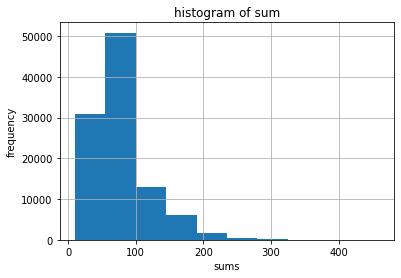

In [25]:
clnt_monthly_aggregations['mth_txn_amt_sum'].hist()
plt.title('histogram of sum')
plt.xlabel('sums')
plt.ylabel('frequency')
plt.show()

In [26]:
print(clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0]) 
clnt_monthly_aggregations['mth_txn_amt_sum'].max()

77


460

In [27]:
print(clnt_annual_aggregations['ann_txn_amt_sum'].mode()[0]) 
clnt_annual_aggregations['ann_txn_amt_sum'].max()

97


1317

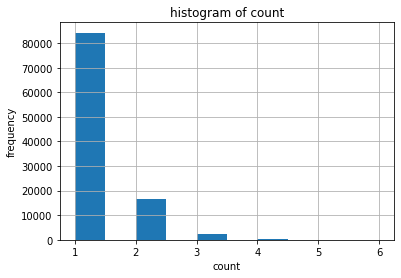

In [28]:
clnt_monthly_aggregations['mth_txn_cnt'].hist()
plt.title('histogram of count')
plt.xlabel('count')
plt.ylabel('frequency')
plt.show()

In [29]:
print(clnt_monthly_aggregations['mth_txn_cnt'].mode()[0])
clnt_monthly_aggregations['mth_txn_cnt'].max()

1


6

In [30]:
print(clnt_annual_aggregations['ann_txn_cnt'].mode()[0]) 
clnt_annual_aggregations['ann_txn_cnt'].max()

3


18

 Create a histogram of both columns you cre-
ated. What are your observations? What are
the most common and maximum values for each
column? How do they compare with the ones
in section 1.2?

A: For histogram of sum, the most common values are 77 and maximum values are 460.
For histogram of count most common values are 1 and maximum values are 6.
Comparing with the histogram of 1.2, x-axis limit is decreased and most common and maximum values are all getting samller for both graphs.

#1.4 Create the base table for the rolling window features

In [31]:
clnt_no = txn['customer_id'].unique() #Create the numpy array of the unique elements
me_dt = txn['ME_DT'].unique()

In [32]:
print(len(txn['customer_id'].unique()))  ##Confirm that you have 6,889 unique client and 47 unique month-end-dates.
len(txn['ME_DT'].unique())

6889


47

In [33]:
from itertools import product
base_table = product(clnt_no , me_dt)
type(base_table)

itertools.product

In [34]:
base_table_pd = pd.DataFrame.from_records(base_table,columns = ['CLNT_NO','ME_DT'])
base_table_pd.head()

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31


In [35]:
base_table_pd.loc[base_table_pd['CLNT_NO'] =='CS1112']

,CLNT_NO,ME_DT
157027,CS1112,2013-02-28
157028,CS1112,2015-03-31
157029,CS1112,2011-11-30
157030,CS1112,2013-11-30
157031,CS1112,2014-03-31
157032,CS1112,2012-02-29
157033,CS1112,2015-01-31
157034,CS1112,2013-01-31
157035,CS1112,2013-08-31
157036,CS1112,2013-07-31


The data all falls between Timestamp('2011-05-16 00:00:00') (min) and Timestamp('2015-03-16 00:00:00') (max).

In [36]:
len(base_table_pd.loc[base_table_pd['CLNT_NO'] =='CS1112'])

47

In [37]:
base_table_pd.shape[0] ##Confirm that the base table pd has 323,783 rows

323783

#1.5 Create the monthly rolling window features

In [38]:
clnt_monthly_aggregations.shape

(103234, 2)

In [39]:
clnt_monthly_aggregations = clnt_monthly_aggregations.reset_index(level=[0,1])

In [40]:
clnt_monthly_aggregations= clnt_monthly_aggregations.rename(columns={'customer_id': 'CLNT_NO'})

In [41]:
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations,on = ['CLNT_NO', 'ME_DT'],how = 'left' )

In [42]:
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN


Why do some rows have NaN values?

A:Because clnt_monthly_aggregations has fewer rows than base_table_pd.


What values will you choose to impute NaN values in the sum and count columns?

A: I will choose 0 to impute NaN values in the sum and count columns.

Perform the imputation you suggest.


In [43]:
base_clnt_mth= base_clnt_mth.fillna(0)

In [44]:
base_clnt_mth.shape

(323783, 4)

Confirm that the number of rows is what you expect. What is the value?

A: There are 323783 rows


How are tables base clnt mth and clnt monthly aggregations different? Comment on the number of rows and the content of each table.

A:clnt_monthly_aggregations has 103234 rows and base_clnt_mth has 323783 rows.clnt_monthly_aggregations and base_clnt_mth both have the same columns. The rows in clnt_monthly_aggregations shows all trascation of clients. The rows in base_clnt_mth shows each customers with 12 months trscations even there are 0 trascations.


In [45]:
base_clnt_mth= base_clnt_mth.sort_values(['CLNT_NO', 'ME_DT'])

In [46]:
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0


##3 rolling window 

In [47]:
base_clnt_mth_gb= base_clnt_mth.groupby('CLNT_NO')[['mth_txn_amt_sum','mth_txn_cnt']]

In [48]:
base_clnt_mth_gb.head()

,mth_txn_amt_sum,mth_txn_cnt
157064,0.0,0.0
157058,56.0,1.0
157044,0.0,0.0
157069,96.0,1.0
157060,0.0,0.0
...,...,...
295150,0.0,0.0
295144,0.0,0.0
295130,0.0,0.0
295155,0.0,0.0


In [49]:
rolling_features_3M = base_clnt_mth_gb.rolling(3).agg(['sum', 'mean', 'max'])

In [50]:
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

In [51]:
rolling_features_6M = base_clnt_mth_gb.rolling(6).agg(['sum', 'mean', 'max'])
rolling_features_12M = base_clnt_mth_gb.rolling(12).agg(['sum', 'mean', 'max'])

In [52]:
print(rolling_features_6M[:6])
print(rolling_features_12M[:12])

               mth_txn_amt_sum                  mth_txn_cnt          
                           sum       mean   max         sum mean  max
CLNT_NO                                                              
CS1112  157064             NaN        NaN   NaN         NaN  NaN  NaN
        157058             NaN        NaN   NaN         NaN  NaN  NaN
        157044             NaN        NaN   NaN         NaN  NaN  NaN
        157069             NaN        NaN   NaN         NaN  NaN  NaN
        157060             NaN        NaN   NaN         NaN  NaN  NaN
        157048           212.0  35.333333  96.0         3.0  0.5  1.0
               mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN 

How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?

A: 2,5,11 rows of NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively. Because in order to captured the 3 values, the window needs to slides twice. So does the 6 rolling windows and 12 rolling windows, they needs to slides 5 and 11 times respectively.

In [53]:
print(rolling_features_3M.columns.nlevels)
print(rolling_features_6M.columns.nlevels)
print(rolling_features_12M.columns.nlevels)

2
2
2


In [54]:
print(rolling_features_3M.index.nlevels)
print(rolling_features_6M.index.nlevels)
print(rolling_features_12M.index.nlevels)

2
2
2


How many levels do the index and columns have? Are these MultiIndex dataframes?

A: They have 2 levels columns and ibndex.They are multiindex dataframes. 

In [55]:
rolling_features_3M = rolling_features_3M.set_axis(['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M'], axis=1)
rolling_features_6M = rolling_features_6M.set_axis(['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M'], axis=1)
rolling_features_12M = rolling_features_12M.set_axis(['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M'], axis=1)


In [56]:
rolling_features_12M.head()

amt_sum_12M  amt_mean_12M  amt_max_12M  txn_cnt_sum_12M  \
CLNT_NO                                                                   
CS1112  157064          NaN           NaN          NaN              NaN   
        157058          NaN           NaN          NaN              NaN   
        157044          NaN           NaN          NaN              NaN   
        157069          NaN           NaN          NaN              NaN   
        157060          NaN           NaN          NaN              NaN   

                txn_cnt_mean_12M  txn_cnt_max_12M  
CLNT_NO                                            
CS1112  157064               NaN              NaN  
        157058               NaN              NaN  
        157044               NaN              NaN  
        157069               NaN              NaN  
        157060               NaN              NaN

In [57]:
merge_3 = rolling_features_3M.droplevel(level=0)
merge_6 = rolling_features_6M.droplevel(level=0)
merge_12 = rolling_features_12M.droplevel(level=0)

In [58]:
all_rolling_features = base_clnt_mth.join([merge_3,merge_6,merge_12])##join on indexes only allow on index

In [59]:
all_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
all_rolling_features.shape

(323783, 22)

In [61]:
all_rolling_features.to_excel('mth_rolling_features.xlsx')

#1.6 Date-related features: date of the week

In [62]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday


Text(0.5, 1.0, 'the count of transactions per day of the week')

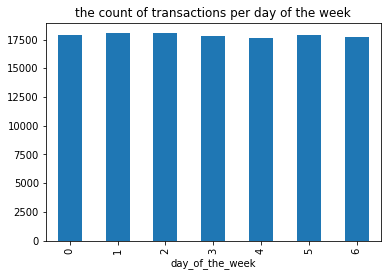

In [63]:
txn.groupby(['day_of_the_week'])['tran_amount'].count().plot(kind='bar')
plt.title('the count of transactions per day of the week')

In [64]:
annual_day_of_week_counts = txn.groupby(['customer_id','YEAR','day_name'])['tran_amount'].count()
annual_day_of_week_counts = pd.DataFrame(annual_day_of_week_counts)
annual_day_of_week_counts=annual_day_of_week_counts.rename(columns={'tran_amount': 'cnt'})
annual_day_of_week_pivot = annual_day_of_week_counts.pivot_table(index='customer_id',columns=['YEAR','day_name'])

In [65]:
annual_day_of_week_pivot= annual_day_of_week_pivot.fillna(0).astype(int)
annual_day_of_week_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [66]:
level_0 = annual_day_of_week_pivot.columns.get_level_values(0).astype(str)
level_1 = annual_day_of_week_pivot.columns.get_level_values(1).astype(str)
level_2 = annual_day_of_week_pivot.columns.get_level_values(2).astype(str)
annual_day_of_week_pivot.columns = level_0 + '_' + level_1+ '_' + level_2

In [67]:
annual_day_of_week_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,...,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


In [68]:
print(clnt_annual_aggregations_pivot.shape) ##table from section1.2
print(annual_day_of_week_pivot.shape) 

(6889, 40)
(6889, 35)


How many features/columns did you create in this section?

A:The table has the same number of rows as final output in section 1.2.There are 6889 rows and 35 columns in this section.

In [69]:
annual_day_of_week_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx')

In [70]:
me_of_week_counts = txn.groupby(['customer_id','ME_DT','day_name'])['tran_amount'].count()
me_of_week_counts = pd.DataFrame(me_of_week_counts)
me_of_week_counts=me_of_week_counts.rename(columns={'tran_amount': 'cnt'})
me_of_week_pivot = me_of_week_counts.pivot_table(index=['customer_id','ME_DT'],columns=['day_name'])


In [71]:
level_0 = me_of_week_pivot.columns.get_level_values(0).astype(str)
level_1 = me_of_week_pivot.columns.get_level_values(1).astype(str)
me_of_week_pivot.columns = level_0 + '_' + level_1

In [72]:
me_of_week_pivot = me_of_week_pivot.fillna(0).astype(int)
me_of_week_pivot.head()

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0

In [73]:
me_of_week_pivot = me_of_week_pivot.reset_index(level=[0,1])
me_of_week_pivot = me_of_week_pivot.rename(columns={'customer_id': 'CLNT_NO'})
me_of_week_pivot.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-06-30,0,0,0,0,0,0,1
1,CS1112,2011-08-31,1,0,0,0,0,0,0
2,CS1112,2011-10-31,0,0,0,1,0,0,0
3,CS1112,2012-04-30,0,0,0,1,0,0,0
4,CS1112,2012-06-30,0,0,0,1,0,0,0


In [74]:
mth_day_counts=base_table_pd.merge(me_of_week_pivot,on = ['CLNT_NO', 'ME_DT'],how = 'left' )
mth_day_counts=mth_day_counts.fillna(0)

In [75]:
mth_day_counts.to_excel('mth_day_counts.xlsx')

#1.7 Date-related features: days since last transaction

In [76]:
txn['month'] = txn['txn_date'].dt.month ##create new month column
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name,month
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday,2
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday,3
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday,2
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday,11
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday,11


In [77]:
#capture the last transaction in a month for every client
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg(last_monthly_purchase = ('txn_date','max'))
last_monthly_purchase

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24
...                                      ...
CS9000      2014-01-31            2014-01-12
            2014-05-31            2014-05-08
            2014-07-31            2014-07-08
            2014-08-31            2014-08-24
            2015-02-28            2015-02-28

[103234 rows x 1 columns]

In [78]:
last_monthly_purchase= last_monthly_purchase.reset_index(level=[0,1])
last_monthly_purchase = last_monthly_purchase.rename(columns={'customer_id': 'CLNT_NO'})
last_monthly_purchase.head()

,CLNT_NO,ME_DT,last_monthly_purchase
0,CS1112,2011-06-30,2011-06-15
1,CS1112,2011-08-31,2011-08-19
2,CS1112,2011-10-31,2011-10-02
3,CS1112,2012-04-30,2012-04-08
4,CS1112,2012-06-30,2012-06-24


In [79]:
last_monthly_purchase=base_table_pd.merge(last_monthly_purchase,on = ['CLNT_NO', 'ME_DT'],how = 'left' )
last_monthly_purchase = last_monthly_purchase.sort_values(['CLNT_NO','ME_DT'])
last_monthly_purchase.loc[last_monthly_purchase['CLNT_NO'] =='CS1112'].head()

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT


What values will you use to impute the NaT values here? NaT stands for ”Not a Timestamp”.

A: I would put the previous month's last date of purchase to fill in the NaT

In [80]:
last_monthly_purchase = last_monthly_purchase.groupby(['CLNT_NO']).apply(lambda x: x.ffill())
last_monthly_purchase[92:98]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


In [81]:
last_monthly_purchase['days_since_last_txn']=last_monthly_purchase['ME_DT']-last_monthly_purchase['last_monthly_purchase']
last_monthly_purchase['days_since_last_txn'] =last_monthly_purchase['days_since_last_txn'].dt.days
last_monthly_purchase.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


Text(0, 0.5, 'frequency')

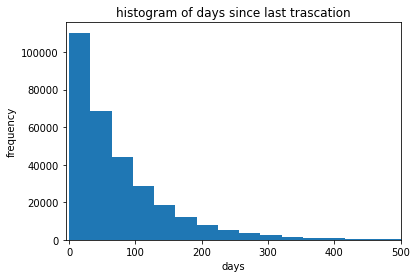

In [82]:
from numpy import histogram
last_monthly_purchase['days_since_last_txn'].plot(kind='hist',bins=30)
plt.title('histogram of days since last trascation')
plt.xlabel('days')
plt.xlim([-5,500])
plt.ylabel('frequency')

I choose to fill in NaN values with 1. Because the most common days since last transcation is 1 day.

In [83]:
last_monthly_purchase['days_since_last_txn']=last_monthly_purchase['days_since_last_txn'].fillna(1)
last_monthly_purchase.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,1.0
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


In [84]:
last_monthly_purchase[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel('days_since_last_txn.xlsx')